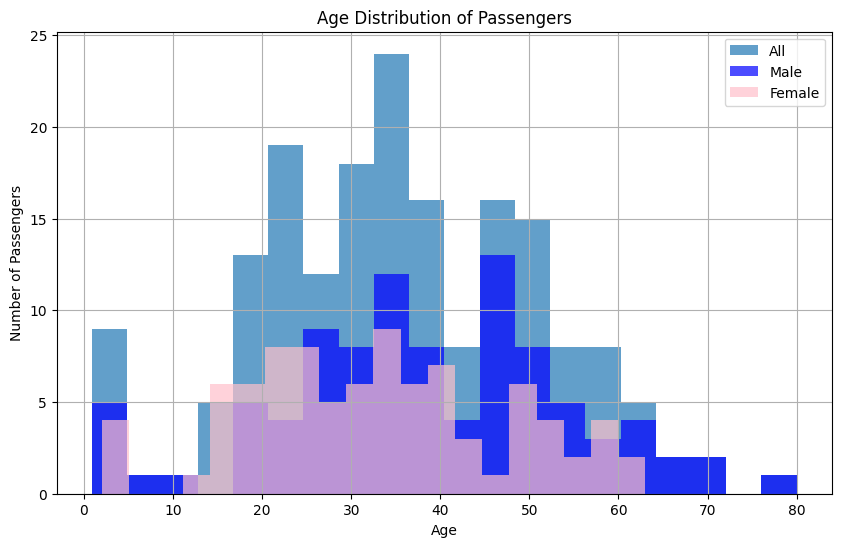

In [1]:
# разбейте исходную таблицу на 2: по полу пассажиров
# удалите пустые строки или заполните их соответствующими символами
# Построить гистограмму распределения пассажиров по возрасту
# Вычислите мин и макс, среднее, моду, медиану возраста пассажира каждого пола
# визуализировать возраст при помощи различных настроек метода plot

# изменение типов данных таблицы
# my_series = pd.to_numeric(my_series)
# s = s.astype(np.float16) # for series
#
# df.drop(columns=['col1', 'col2']) # drop columns
# df.drop([0, 1])# drop rows

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv("titanic.csv")

# Удаление пустых строк
df_cleaned = df.dropna()

# Разделение на два подмножества: по полу
male_df = df_cleaned[df_cleaned['Sex'] == 'male']
female_df = df_cleaned[df_cleaned['Sex'] == 'female']

# Построение гистограммы распределения пассажиров по возрасту
plt.figure(figsize=(10, 6))
df_cleaned['Age'].hist(bins=20, alpha=0.7, label='All')
male_df['Age'].hist(bins=20, alpha=0.7, label='Male', color='blue')
female_df['Age'].hist(bins=20, alpha=0.7, label='Female', color='pink')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Age Distribution of Passengers')
plt.legend()
plt.show()

In [2]:
# Вычисление мин, макс, среднее, мода, медиана возраста пассажиров каждого пола
def calculate_age_stats(df, gender):
    min_age = df['Age'].min()
    max_age = df['Age'].max()
    mean_age = df['Age'].mean()
    median_age = df['Age'].median()
    mode_age = df['Age'].mode()[0]
    print(f"{gender.capitalize()} Age Statistics:")
    print(f"Min: {min_age}, Max: {max_age}, Mean: {mean_age:.2f}, Median: {median_age}, Mode: {mode_age}\n")

calculate_age_stats(male_df, 'male')
calculate_age_stats(female_df, 'female')

Male Age Statistics:
Min: 0.92, Max: 80.0, Mean: 38.45, Median: 37.0, Mode: 36.0

Female Age Statistics:
Min: 2.0, Max: 63.0, Mean: 32.68, Median: 32.25, Mode: 24.0



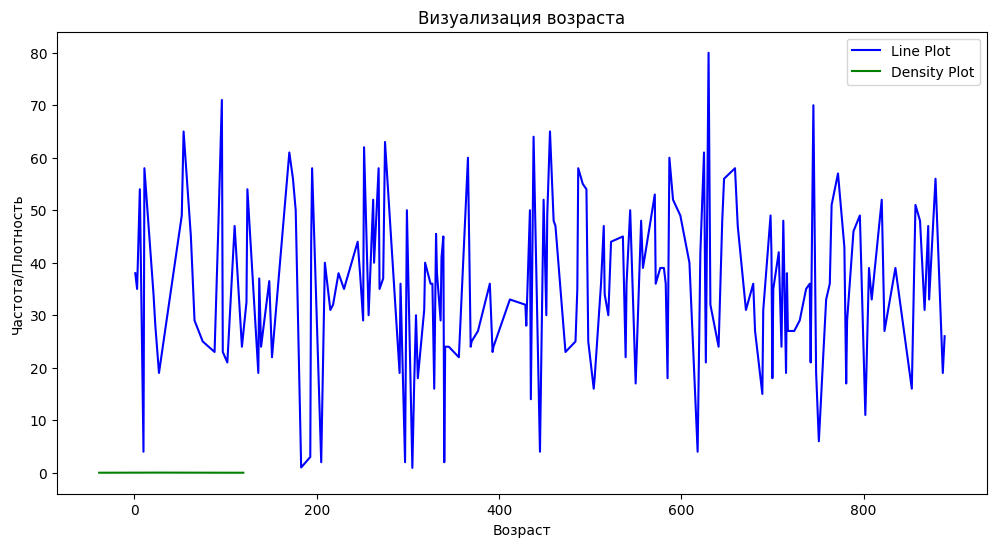

In [3]:
# Визуализация возраста с различными методами plot
plt.figure(figsize=(12, 6))
df_cleaned['Age'].plot(kind='line', label='Line Plot', color='blue')
df_cleaned['Age'].plot(kind='density', label='Density Plot', color='green')
plt.title('Визуализация возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота/Плотность')
plt.legend()
plt.show()

In [4]:
# Изменение типов данных в таблице: преобразование столбца 'Age' в числовой тип и уменьшение размера
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # Преобразуем значения в числовой тип (NaN для некорректных данных)
df['Age'] = df['Age'].astype(np.float16)  # Уменьшаем размер данных

# Проверка изменения
print(df.dtypes)

# Удаляем колонки 
df = df.drop(columns=['Cabin', 'Ticket'])

# Удаляем строки 
df = df.drop([0, 1])

# Вывод первых строк таблицы
print(df.head()) 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float16
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
   PassengerId  Survived  Pclass  \
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   

                                           Name     Sex   Age  SibSp  Parch  \
2                        Heikkinen, Miss. Laina  female  26.0      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                      Allen, Mr. William Henry    male  35.0      0      0   
5                              Moran, Mr. James    male   NaN      0      0   
6                       McCarthy, Mr. Timothy J    male  54.0      0      0   

      Fare Embarke